In [ ]:
import numpy as np

n1 = 15
y1 = 2
n2 = 278
num_simulations = 10000

results = np.zeros(num_simulations)

for i in range(num_simulations):
    results[i] = np.random.binomial(n2, 3/17)

approx_mean = np.mean(results)
approx_std_dev = np.std(results)

print("Approximate Mean of Y2:", approx_mean)
print("Approximate Standard Deviation of Y2:", approx_std_dev)


Approximate Mean of Y2: 49.1625
Approximate Standard Deviation of Y2: 6.402694257107706


In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

menchild30bach = [1, 0, 0, 1, 2, 2, 1, 5, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 3, 2, 0, 0, 3, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 3, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 3, 0, 0, 0, 1, 1]
menchild30nobach = [2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 3, 6, 1, 6, 4, 0, 3, 2, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 4, 2, 1, 0, 0, 1, 0, 3, 2, 5, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 4, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 3, 2, 0, 2, 1, 3, 1, 3, 2, 2, 3, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 3, 3, 0, 1, 2, 2, 2, 0, 6, 0, 0, 0, 2, 0, 1, 1, 1, 3, 3, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 4, 1, 2, 3, 2, 0, 0, 0, 1, 0, 0, 1, 5, 2, 1, 3, 2, 0, 2, 1, 1, 3, 0, 5, 0, 0, 2, 4, 3, 4, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 3, 2, 2, 0, 0, 2, 3, 2, 4, 3, 3, 4, 0, 3, 0, 1, 0, 1, 2, 3, 4, 1, 2, 6, 2, 1, 2, 2]

with pm.Model() as model:
    theta_a = pm.Gamma('theta_a', alpha=2, beta=1)
    theta_b = pm.Gamma('theta_b', alpha=2, beta=1)

    y_a = pm.Poisson('y_a', mu=theta_a, observed=menchild30bach)
    y_b = pm.Poisson('y_b', mu=theta_b, observed=menchild30nobach)

    y_pred_a = pm.Poisson('y_pred_a', mu=theta_a)
    y_pred_b = pm.Poisson('y_pred_b', mu=theta_b)

    trace = pm.sample(5000, return_inferencedata=False, random_seed=42)
    ppc = pm.sample_posterior_predictive(trace, var_names=['y_pred_a', 'y_pred_b'], random_seed=42)

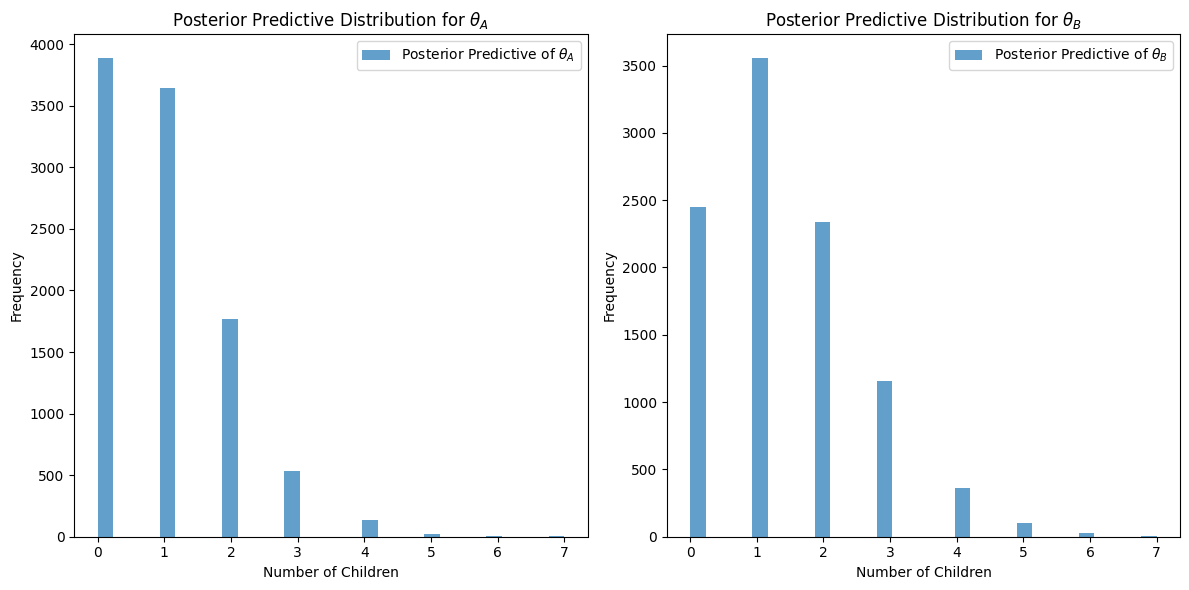

In [ ]:
import arviz as az
import matplotlib.pyplot as plt

y_pred_a_samples = ppc.posterior_predictive['y_pred_a'].values.flatten()
y_pred_b_samples = ppc.posterior_predictive['y_pred_b'].values.flatten()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_pred_a_samples, bins=30, alpha=0.7, label='Posterior Predictive of $\\theta_A$')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Distribution for $\\theta_A$')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_pred_b_samples, bins=30, alpha=0.7, label='Posterior Predictive of $\\theta_B$')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Distribution for $\\theta_B$')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import arviz as az

theta_a_samples = trace['theta_a']
theta_b_samples = trace['theta_b']

theta_diff = theta_b_samples - theta_a_samples

theta_diff_ci = np.quantile(theta_diff, [0.025, 0.975])

y_pred_a_samples = ppc.posterior_predictive['y_pred_a'].values.flatten()
y_pred_b_samples = ppc.posterior_predictive['y_pred_b'].values.flatten()

y_pred_diff = y_pred_b_samples - y_pred_a_samples

y_pred_diff_ci = np.quantile(y_pred_diff, [0.025, 0.975])

print("95% CI for theta difference (theta_B - theta_A):", theta_diff_ci)
print("95% CI for Y_pred difference (Y_pred_B - Y_pred_A):", y_pred_diff_ci)


95% CI for theta difference (theta_B - theta_A): [0.15530808 0.73787651]
95% CI for Y_pred difference (Y_pred_B - Y_pred_A): [-2.  3.]


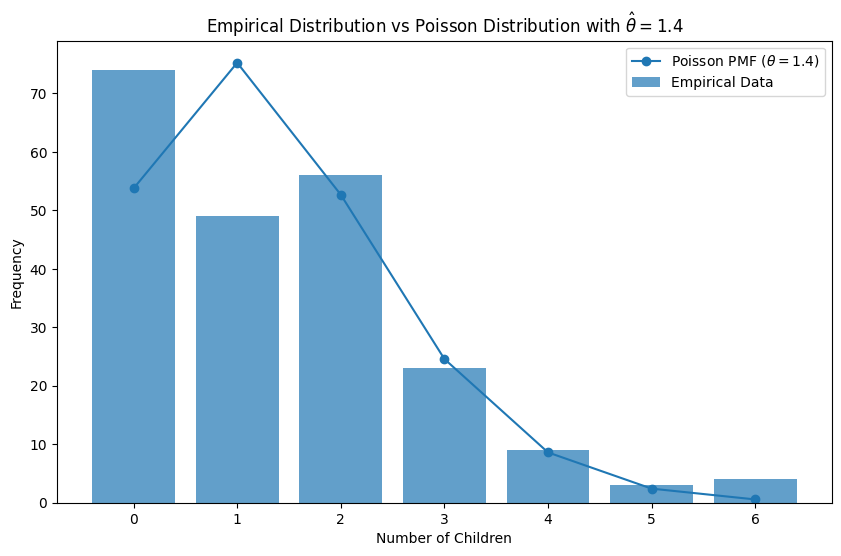

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

data_b = menchild30nobach

empirical_counts = np.bincount(data_b)
x = np.arange(len(empirical_counts))

theta_hat = 1.4
poisson_pmf = poisson.pmf(x, theta_hat) * len(data_b)

plt.figure(figsize=(10, 6))
plt.bar(x, empirical_counts, alpha=0.7, label='Empirical Data')
plt.plot(x, poisson_pmf, 'o-', label='Poisson PMF ($\\theta = 1.4$)')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Empirical Distribution vs Poisson Distribution with $\\hat{\\theta} = 1.4$')
plt.legend()
plt.show()


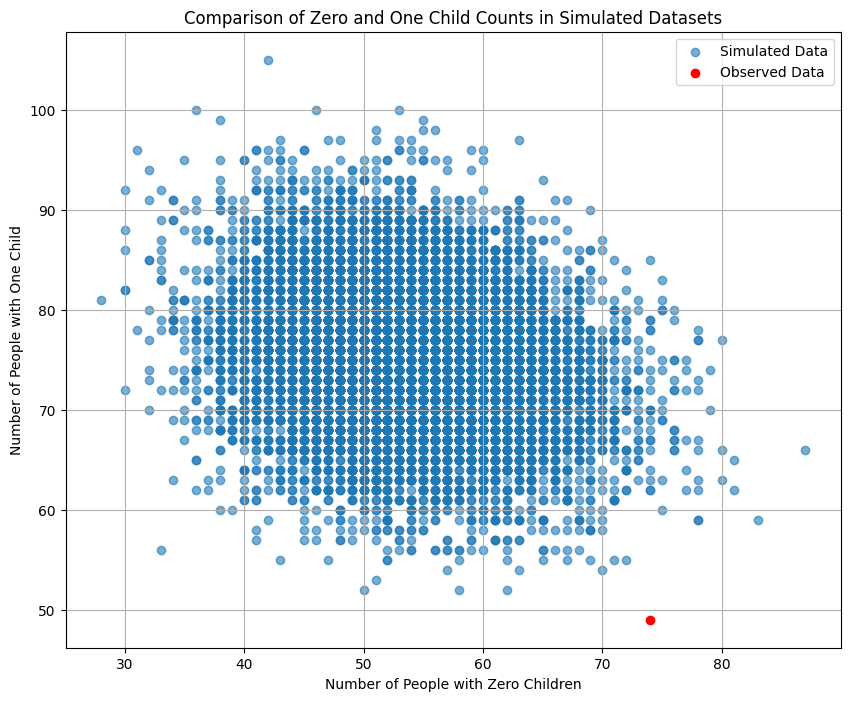

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nB = 218
zero_children_counts = []
one_child_counts = []

for theta in theta_b_samples:
    simulated_data = np.random.poisson(theta, nB)
    zero_children_counts.append(np.sum(simulated_data == 0))
    one_child_counts.append(np.sum(simulated_data == 1))

observed_zero_children = data_b.count(0)
observed_one_child = data_b.count(1)

plt.figure(figsize=(10, 8))
plt.scatter(zero_children_counts, one_child_counts, alpha=0.6, label='Simulated Data')
plt.scatter(observed_zero_children, observed_one_child, color='red', label='Observed Data', zorder=5)
plt.xlabel('Number of People with Zero Children')
plt.ylabel('Number of People with One Child')
plt.title('Comparison of Zero and One Child Counts in Simulated Datasets')
plt.legend()
plt.grid(True)
plt.show()


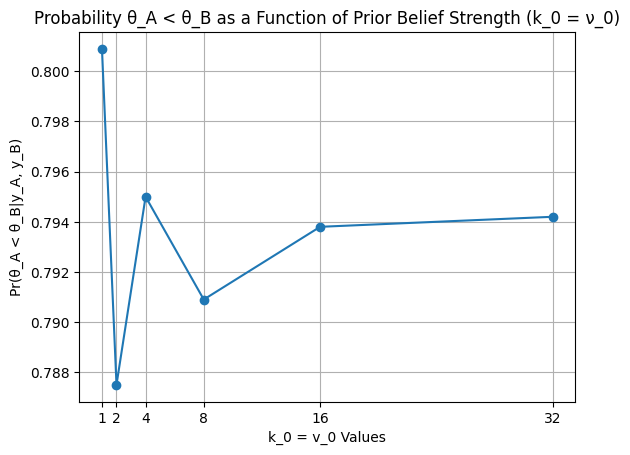

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

y_bar_A = 75.2
s_A = 7.3
n_A = 16
y_bar_B = 77.5
s_B = 8.1
n_B = 16
mu_0 = 75
sigma2_0 = 100

k_0_v_0_pairs = [(1, 1), (2, 2), (4, 4), (8, 8), (16, 16), (32, 32)]

def posterior_parameters(mu_0, sigma2_0, y_bar, s, n, k_0, v_0):
    sigma2_n = 1 / (1/sigma2_0 + n/s**2)
    mu_n = sigma2_n * (mu_0/sigma2_0 + n*y_bar/s**2)
    return mu_n, sigma2_n

def estimate_probability(mu_0, sigma2_0, y_bar_A, s_A, n_A, y_bar_B, s_B, n_B, k_0_v_0_pairs):
    probabilities = []
    for k_0, v_0 in k_0_v_0_pairs:
        mu_n_A, sigma2_n_A = posterior_parameters(mu_0, sigma2_0, y_bar_A, s_A, n_A, k_0, v_0)
        mu_n_B, sigma2_n_B = posterior_parameters(mu_0, sigma2_0, y_bar_B, s_B, n_B, k_0, v_0)

        theta_A_samples = np.random.normal(mu_n_A, np.sqrt(sigma2_n_A), 10000)
        theta_B_samples = np.random.normal(mu_n_B, np.sqrt(sigma2_n_B), 10000)

        probability_A_less_than_B = np.mean(theta_A_samples < theta_B_samples)
        probabilities.append(probability_A_less_than_B)

    return probabilities

probabilities = estimate_probability(mu_0, sigma2_0, y_bar_A, s_A, n_A, y_bar_B, s_B, n_B, k_0_v_0_pairs)

k_0_v_0_values = [pair[0] for pair in k_0_v_0_pairs]  # k_0 and v_0 are the same in our pairs
plt.plot(k_0_v_0_values, probabilities, marker='o', linestyle='-')
plt.xlabel('k_0 = v_0 Values')
plt.ylabel('Pr(θ_A < θ_B|y_A, y_B)')
plt.title('Probability θ_A < θ_B as a Function of Prior Belief Strength (k_0 = ν_0)')
plt.grid(True)
plt.xticks(k_0_v_0_values)
plt.show()


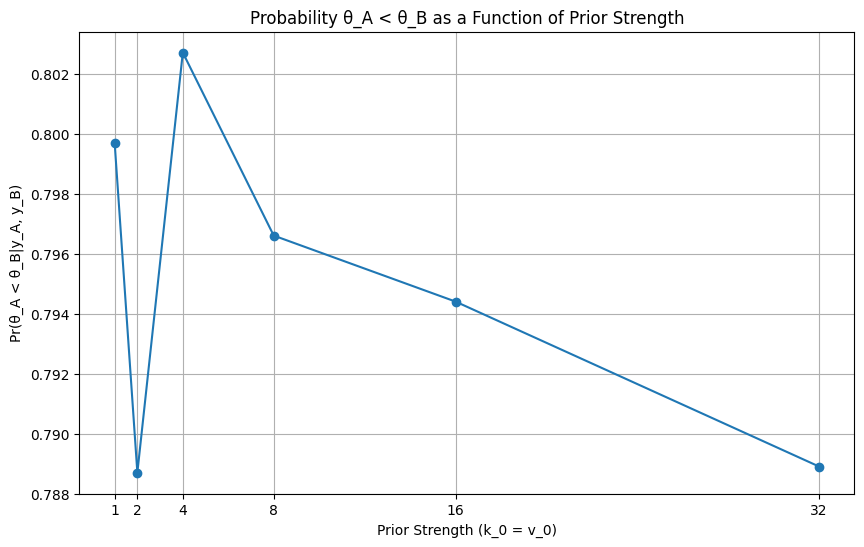

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_bar_A, s_A, n_A = 75.2, 7.3, 16
y_bar_B, s_B, n_B = 77.5, 8.1, 16
mu_0, sigma2_0 = 75, 100  # Prior parameters
kv_pairs = [(1, 1), (2, 2), (4, 4), (8, 8), (16, 16), (32, 32)]

def compute_posterior_params(y_bar, s, n, mu_0, sigma2_0, k_0, v_0):
    sigma2_n = 1 / (1/sigma2_0 + n/s**2)
    mu_n = sigma2_n * (mu_0/sigma2_0 + n*y_bar/s**2)
    return mu_n, sigma2_n

def monte_carlo_pr_theta_a_lt_theta_b(kv_pairs, y_bar_A, s_A, n_A, y_bar_B, s_B, n_B, mu_0, sigma2_0):
    pr_theta_a_lt_theta_b = []
    for k_0, v_0 in kv_pairs:
        mu_A, sigma2_A = compute_posterior_params(y_bar_A, s_A, n_A, mu_0, sigma2_0, k_0, v_0)
        mu_B, sigma2_B = compute_posterior_params(y_bar_B, s_B, n_B, mu_0, sigma2_0, k_0, v_0)

        theta_A_samples = np.random.normal(mu_A, np.sqrt(sigma2_A), 10000)
        theta_B_samples = np.random.normal(mu_B, np.sqrt(sigma2_B), 10000)

        pr = np.mean(theta_A_samples < theta_B_samples)
        pr_theta_a_lt_theta_b.append(pr)

    return pr_theta_a_lt_theta_b

pr_theta_a_lt_theta_b = monte_carlo_pr_theta_a_lt_theta_b(kv_pairs, y_bar_A, s_A, n_A, y_bar_B, s_B, n_B, mu_0, sigma2_0)

k0_v0_values = [kv[0] for kv in kv_pairs]
plt.figure(figsize=(10, 6))
plt.plot(k0_v0_values, pr_theta_a_lt_theta_b, marker='o', linestyle='-')
plt.xlabel('Prior Strength (k_0 = v_0)')
plt.ylabel('Pr(θ_A < θ_B|y_A, y_B)')
plt.title('Probability θ_A < θ_B as a Function of Prior Strength')
plt.xticks(k0_v0_values)
plt.grid(True)
plt.show()


In [1]:
import numpy as np

yA_correct = np.array([
    25.33, 26.77, 22.76, 20.94, 25.40, 22.49, 24.54, 20.40, 21.85, 22.21,
    26.21, 22.07, 29.09, 25.00, 22.96, 22.13, 22.91, 25.04, 27.43, 24.34,
    24.08, 25.71, 21.58, 22.13, 26.28, 28.02, 25.24, 24.80, 22.41, 26.08,
    24.29, 25.52, 23.18, 26.67, 24.39, 21.94, 24.93, 22.23, 23.48, 23.48,
    25.91, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
    np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
])

yB_correct = np.array([
    26.45, 27.53, 20.02, 22.83, 28.05, 23.67, 23.25, 21.38, 24.39, 23.77,
    27.35, 21.44, 27.14, 27.35, 26.61, 25.12, 26.64, 23.01, 27.00, 25.36,
    24.63, 26.77, 23.06, 22.54, 24.36, 24.14, np.nan, np.nan, np.nan, np.nan,
    np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
    np.nan, np.nan, 27.48, 20.32, 24.47, 24.99, 25.41, 27.81, 26.24, 26.08,
    24.67, 23.74, 26.23, 26.89, 22.62, 21.19, 26.21, 26.06, 22.36
])

yA_nonan = yA_correct[~np.isnan(yA_correct)]
yB_nonan = yB_correct[~np.isnan(yB_correct)]

theta_hat_A = np.mean(yA_nonan)
theta_hat_B = np.mean(yB_nonan)
sigma_hat_squared_A = np.var(yA_nonan, ddof=1)
sigma_hat_squared_B = np.var(yB_nonan, ddof=1)

non_nan_mask = ~np.isnan(yA_correct) & ~np.isnan(yB_correct)
rho_hat = np.corrcoef(yA_correct[non_nan_mask], yB_correct[non_nan_mask])[0, 1]

theta_hat_A, theta_hat_B, rho_hat, sigma_hat_squared_A, sigma_hat_squared_B


(24.200487804878048,
 24.805348837209298,
 0.6164509013184667,
 4.092799756097561,
 4.69157785160576)

In [ ]:
from scipy import stats

nan_A_indices = np.where(np.isnan(yA_correct))[0]
nan_B_indices = np.where(np.isnan(yB_correct))[0]

imputed_B_responses = yB_correct.copy()
for i in nan_B_indices:
    imputed_B_responses[i] = theta_hat_B + ((yA_correct[i] - theta_hat_A) * rho_hat *
                                            np.sqrt(sigma_hat_squared_B / sigma_hat_squared_A))

imputed_A_responses = yA_correct.copy()
for i in nan_A_indices:
    imputed_A_responses[i] = theta_hat_A + ((yB_correct[i] - theta_hat_B) * rho_hat *
                                            np.sqrt(sigma_hat_squared_A / sigma_hat_squared_B))

differences = imputed_A_responses - imputed_B_responses

mean_difference = np.mean(differences)
std_dev_difference = np.std(differences, ddof=1)
n = len(differences)

t_statistic, p_value = stats.ttest_rel(imputed_A_responses, imputed_B_responses)

confidence_interval = stats.t.interval(0.95, df=n-1, loc=mean_difference,
                                       scale=std_dev_difference / np.sqrt(n))

t_statistic, p_value, mean_difference, confidence_interval


In [3]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 747.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.6 MB/s eta 0:00:00


In [5]:
import nest_asyncio
nest_asyncio.apply()

In [8]:
import stan
import numpy as np

yA_complete = yA_correct[~np.isnan(yA_correct) & ~np.isnan(yB_correct)]
yB_complete = yB_correct[~np.isnan(yA_correct) & ~np.isnan(yB_correct)]

N_A_missing = np.isnan(yA_correct).sum()
N_B_missing = np.isnan(yB_correct).sum()

import stan

model_code = """
data {
  int<lower=0> N_A;          // number of observations in group A
  int<lower=0> N_B;          // number of observations in group B
  vector[N_A] yA;            // data for group A
  vector[N_B] yB;            // data for group B
}
parameters {
  real theta_A;              // mean of group A
  real theta_B;              // mean of group B
  real<lower=0> sigma_A;     // standard deviation of group A
  real<lower=0> sigma_B;     // standard deviation of group B
}
model {
  // Priors
  theta_A ~ normal(0, 10);
  theta_B ~ normal(0, 10);
  sigma_A ~ cauchy(0, 5);
  sigma_B ~ cauchy(0, 5);

  // Likelihood of observed data
  yA ~ normal(theta_A, sigma_A);
  yB ~ normal(theta_B, sigma_B);
}
generated quantities {
  real delta_theta = theta_A - theta_B; // Difference in means
}
"""

data = {
  'N_A': len(yA_complete),
  'N_B': len(yB_complete),
  'yA': yA_complete,
  'yB': yB_complete
}

posterior = stan.build(model_code, data=data, random_seed=1)

fit = posterior.sample(num_chains=4, num_samples=1000)

delta_theta = fit['delta_theta']

posterior_mean_diff = np.mean(delta_theta)
posterior_cred_interval = np.percentile(delta_theta, [2.5, 97.5])

print(f'Posterior mean for θA − θB: {posterior_mean_diff}')
print(f'95% posterior credible interval for θA − θB: {posterior_cred_interval}')

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!


Posterior mean for θA − θB: -0.6200627672912388
95% posterior credible interval for θA − θB: [-1.87040234  0.68201433]


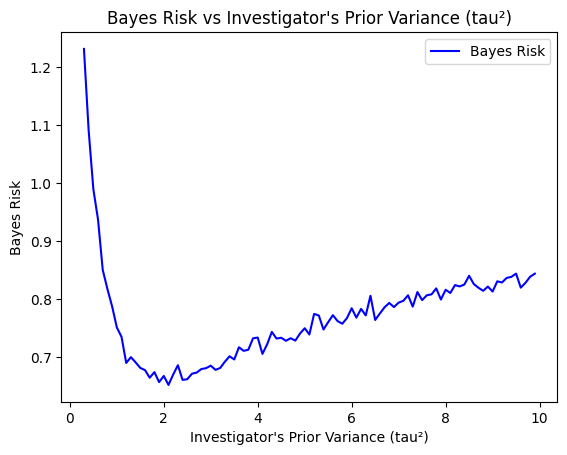

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def posterior_mean(y, tau_squared):
    post_variance = 1 / (1/tau_squared + 1)
    post_mean = post_variance * y
    return post_mean

def bayes_risk(tau_squared, k_squared, n_samples=10000):
    theta_samples = np.random.normal(0, np.sqrt(k_squared), n_samples)
    y_samples = np.random.normal(theta_samples, 1)
    post_means = np.array([posterior_mean(y, tau_squared) for y in y_samples])
    mse = np.mean((theta_samples - post_means)**2)
    return mse


tau_squared_values = np.arange(0.3, 10, 0.1)
k_squared = 2

risks = np.array([bayes_risk(tau, k_squared) for tau in tau_squared_values])

plt.plot(tau_squared_values, risks, 'b-', label='Bayes Risk')
plt.title("Bayes Risk vs Investigator's Prior Variance (tau²)")
plt.xlabel("Investigator's Prior Variance (tau²)")
plt.ylabel("Bayes Risk")
plt.legend()
plt.show()


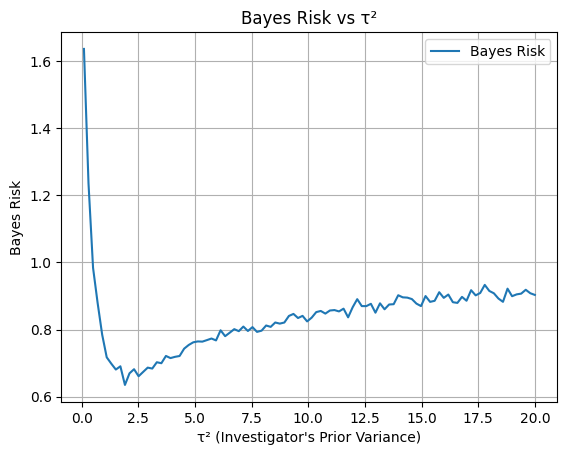

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def posterior_mean(y, tau_squared):
    post_variance = 1 / (1 / tau_squared + 1)
    return post_variance * y

def bayes_risk(tau_squared, k_squared, n_samples=10000):
    theta_samples = np.random.normal(0, np.sqrt(k_squared), n_samples)
    y_samples = theta_samples + np.random.normal(0, 1, n_samples)
    post_means = np.array([posterior_mean(y, tau_squared) for y in y_samples])
    return np.mean((theta_samples - post_means)**2)

k_squared = 2  # fixed
tau_squared_values = np.linspace(0.1, 20, 100)
risks = [bayes_risk(tau, k_squared) for tau in tau_squared_values]

plt.plot(tau_squared_values, risks, label='Bayes Risk')
plt.xlabel('τ² (Investigator\'s Prior Variance)')
plt.ylabel('Bayes Risk')
plt.title('Bayes Risk vs τ²')
plt.legend()
plt.grid(True)
plt.show()
